In [1]:
!git clone 'https://github.com/aakashvardhan/s9-advanced-conv-data-aug.git'

Cloning into 's9-advanced-conv-data-aug'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 71 (delta 36), reused 53 (delta 18), pack-reused 0
Receiving objects: 100% (71/71), 14.56 KiB | 2.43 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
import sys
sys.path.append('/content/s9-advanced-conv-data-aug')
sys.path.append('/content/s9-advanced-conv-data-aug/models')

In [3]:
import albumentations as A
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from albumentations.pytorch import ToTensorV2

In [4]:
# Cited: https://albumentations.ai/docs/examples/pytorch_classification/
def visualize_augmentations(dataset, idx=0, samples=10, cols=5):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        image, _ = dataset[idx]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

In [8]:
from setup_cifar10_data import setup_cifar10
from config import get_config
import random

In [6]:
config = get_config()
train_data,_ ,train_loader, _ = setup_cifar10(config)

CUDA Available? True


100%|██████████| 170498071/170498071 [00:13<00:00, 13020927.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


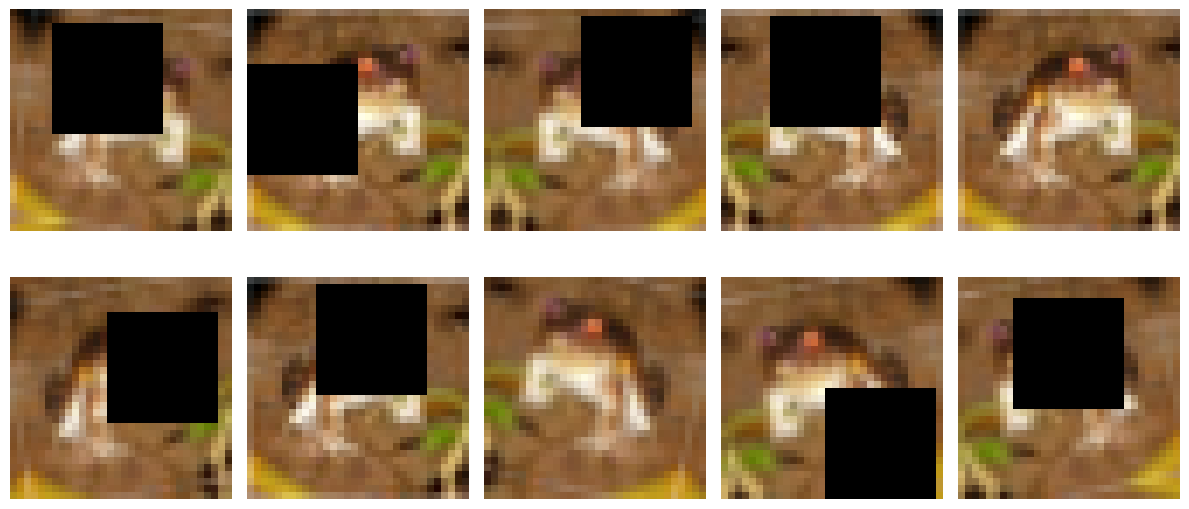

In [9]:
random.seed(42)
visualize_augmentations(train_data)